<a href="https://colab.research.google.com/github/amycelliott/DMP_LP_2022/blob/main/DMP_LP2022_Evaluate_Countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Pandas - Only need to run once

In [1]:
# Install Pandas
#!pip install -U pandas~=1.2.4
# plotly is used for simple visualizations.
#!pip install -U plotly
# Import Pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Bump Plot Function

Source: https://github.com/kartikay-bagla/bump-plot-python

In [2]:
def bumpchart(df, show_rank_axis= True, rank_axis_distance= 1.1, 
              ax= None, scatter= False, holes= False,
              line_args= {}, scatter_args= {}, hole_args= {}):
    
    if ax is None:
        left_yaxis= plt.gca()
    else:
        left_yaxis = ax

    # Creating the right axis.
    right_yaxis = left_yaxis.twinx()
    
    axes = [left_yaxis, right_yaxis]
    
    # Creating the far right axis if show_rank_axis is True
    if show_rank_axis:
        far_right_yaxis = left_yaxis.twinx()
        axes.append(far_right_yaxis)
    
    for col in df.columns:
        y = df[col]
        x = df.index.values
        # Plotting blank points on the right axis/axes 
        # so that they line up with the left axis.
        for axis in axes[1:]:
            axis.plot(x, y, alpha= 0)

        left_yaxis.plot(x, y, **line_args, solid_capstyle='round')
        
        # Adding scatter plots
        if scatter:
            left_yaxis.scatter(x, y, **scatter_args)
            
            #Adding see-through holes
            if holes:
                bg_color = left_yaxis.get_facecolor()
                left_yaxis.scatter(x, y, color= bg_color, **hole_args)

    # Number of lines
    lines = len(df.columns)

    y_ticks = [*range(1, lines + 1)]
    
    # Configuring the axes so that they line up well.
    for axis in axes:
        axis.invert_yaxis()
        axis.set_yticks(y_ticks)
        axis.set_ylim((lines + 0.5, 0.5))
    
    # Sorting the labels to match the ranks.
    left_labels = df.iloc[0].sort_values().index
    right_labels = df.iloc[-1].sort_values().index
    
    left_yaxis.set_yticklabels(left_labels)
    right_yaxis.set_yticklabels(right_labels)
    
    # Setting the position of the far right axis so that it doesn't overlap with the right axis
    if show_rank_axis:
        far_right_yaxis.spines["right"].set_position(("axes", rank_axis_distance))
    
    return axes

# Load Data from GitHub

In [3]:

# Import the files that will be used
from tempfile import mkdtemp
from urllib.request import urlretrieve

tmp_dir = mkdtemp()

# Upload Region Basic Fields
region_basic_csv_path = f"{tmp_dir}/Regions_Basic_Fields.csv"
urlretrieve("https://github.com/amycelliott/DMP_LP_2022/blob/main/files/Regions_Basic_Fields.csv?raw=true", region_basic_csv_path)

# Upload Countries Basic Fields
countries_basic_csv_path = f"{tmp_dir}/Countries_Basic_Fields.csv"
urlretrieve("https://github.com/amycelliott/DMP_LP_2022/blob/main/files/Countries_Basic_Fields.csv?raw=true", countries_basic_csv_path)

# Load CSV for Region Basic Data
df_region_basic = pd.read_csv(
    region_basic_csv_path, 
)

# after loading, we can explore the data in all different ways pandas support
# No need to do this yet
df_region_basic = df_region_basic.sort_values('year', ascending=False)

# Load CSV for County Basic Data
df_country_basic = pd.read_csv(
    countries_basic_csv_path, 
)

# after loading, we can explore the data in all different ways pandas support
# No need to do this yet
df_country_basic = df_country_basic.sort_values('year', ascending=False)

# Drop where Year = 2020 and Country = 'World' as we filter that out everywhere below
df_country_basic = df_country_basic[df_country_basic.year != 2020]
df_country_basic = df_country_basic[df_country_basic.country != 'World']

In [4]:
# How to rank Asc
df_country_basic['Rank_asc'] = df_country_basic.groupby('year')['primary_energy_consumption'].rank()
# How to rank Desc
df_country_basic['Rank_desc'] = df_country_basic.groupby('year')['primary_energy_consumption'].rank(ascending=False)

df_country_basic

,iso_code,country,year,energy_per_gdp,energy_per_capita,per_capita_electricity,population,primary_energy_consumption,gdp,Rank_asc,Rank_desc
9415,MOZ,Mozambique,2019,NaN,NaN,505.274,30366000.0,NaN,NaN,NaN,NaN
8965,MEX,Mexico,2019,NaN,16810.783,2458.569,127576000.0,2144.652,NaN,65.0,15.0
7843,KWT,Kuwait,2019,NaN,108127.063,17003.957,4207000.0,454.891,NaN,33.0,47.0
679,ARG,Argentina,2019,NaN,21479.671,2962.922,44781000.0,961.881,NaN,49.0,31.0
8994,MDA,Moldova,2019,NaN,NaN,1329.421,4043000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3342,COG,Congo,1900,NaN,NaN,NaN,570398.0,NaN,NaN,NaN,NaN
10304,PRK,North Korea,1900,NaN,NaN,NaN,5124045.0,NaN,NaN,NaN,NaN
3181,COL,Colombia,1900,NaN,NaN,NaN,4109030.0,NaN,3.782108e+09,NaN,NaN
2381,BDI,Burundi,1900,NaN,NaN,NaN,1589451.0,NaN,NaN,NaN,NaN


# Graph Top Regions by Energy Consumption

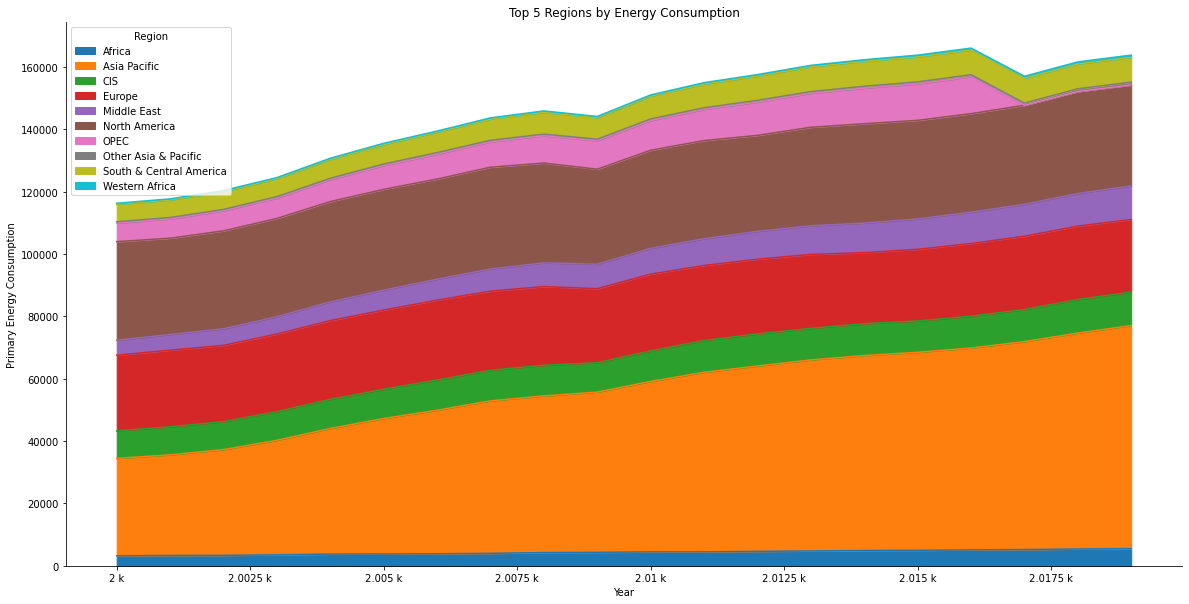

In [5]:
# Set Top Regions 
top_regions = df_region_basic.query('`year` >= 2000')\
.groupby('country').primary_energy_consumption.max()\
.nlargest(10)

# Pivot Data
pivot = df_region_basic.query('`year` >= 2000 & `year` < 2020').pivot_table(
    index='year',
    columns='country', 
    values='primary_energy_consumption',
    margins=True
    )

# First record values show "All" and should get deleted
pivot = pivot.drop('All').head(25)


# for kind - area or line work best
from matplotlib import ticker
ax = pivot[top_regions.sort_index().index].plot(
    kind='area', stacked=True,
    title='Top 5 Regions by Energy Consumption', figsize=(20,10)
)

# formatting
ax.set(xlabel='Year', ylabel='Primary Energy Consumption')
ax.legend(title='Region')

# shows x-axis in millions instead of scientific notation
ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
for spine in ['top', 'right']:
  ax.spines[spine].set_visible(False)

# Graph Top Countries by Energy Consumption

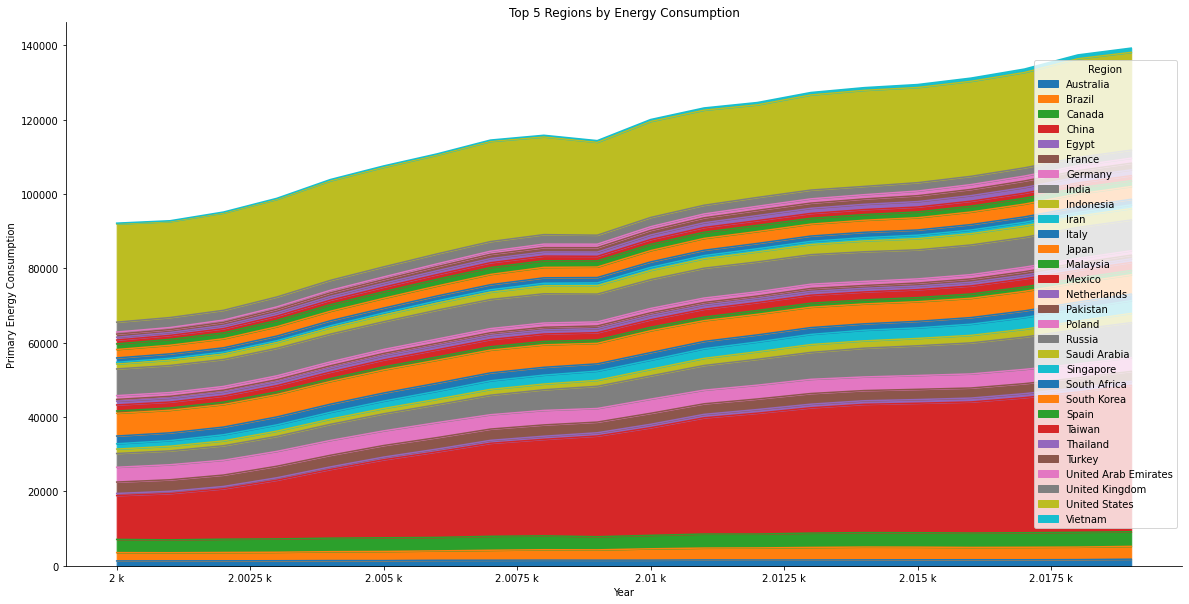

In [6]:
# Set Top Countries (Used elsewhere below)
top_countries = df_country_basic.query('`year` == 2019 & `country` != "World"')\
.groupby('country').primary_energy_consumption.max()\
.nlargest(30)

# Pivot Data - Do not inlcude 2020 as there are 0 for values
pivot = df_country_basic.query('`year` >= 2000 & `year` < 2020').pivot_table(
    index='year',
    columns='country', 
    values='primary_energy_consumption',
    margins=True
    )

# First record values show "All" and should get deleted
pivot = pivot.drop('All').head(25)

# for kind - area or line work best
from matplotlib import ticker
ax = pivot[top_countries.sort_index().index].plot(
    kind='area', stacked=True,
    title='Top 5 Regions by Energy Consumption', figsize=(20,10)
)

# formatting
ax.set(xlabel='Year', ylabel='Primary Energy Consumption')
ax.legend(title='Region')

# shows x-axis in millions instead of scientific notation
ax.xaxis.set_major_formatter(ticker.EngFormatter())
# removes the top and right lines from the figure to make it less boxy
for spine in ['top', 'right']:
  ax.spines[spine].set_visible(False)


In [7]:
# Use top_countries from when we put the graph together
# Create a new pivot table using just First Rank (Ranking using highest Energy Compution)

# Pivot Data - Do not inlcude 2020 as there are 0 for values
pivot_country_rank = df_country_basic.query('`year` >= 2000 & `year` < 2020').pivot_table(
    index='year',
    columns='country', 
    values='Rank_desc',
    margins=True
    )

# First record values show "All" and should get deleted
pivot_country_rank = pivot_country_rank.drop('All').head(25)


df_top_countries_rank = pivot_country_rank[top_countries.sort_index().index]

df_top_countries_rank

country,Australia,Brazil,Canada,China,Egypt,France,Germany,India,Indonesia,Iran,...,South Africa,South Korea,Spain,Taiwan,Thailand,Turkey,United Arab Emirates,United Kingdom,United States,Vietnam
year,,,,,,,,,,,,,,,,,,,,,
2000,18.0,11.0,7.0,2.0,32.0,8.0,5.0,6.0,20.0,16.0,...,19.0,10.0,15.0,21.0,27.0,24.0,34.0,9.0,1.0,62.0
2001,18.0,11.0,7.0,2.0,32.0,8.0,5.0,6.0,19.0,16.0,...,20.0,10.0,14.0,21.0,25.0,26.0,33.0,9.0,1.0,55.0
2002,18.0,11.0,7.0,2.0,32.0,8.0,5.0,6.0,19.0,14.0,...,20.0,10.0,15.0,21.0,24.0,25.0,33.0,9.0,1.0,52.0
2003,19.0,11.0,7.0,2.0,30.0,8.0,6.0,5.0,18.0,14.0,...,20.0,10.0,13.0,21.0,24.0,25.0,31.0,9.0,1.0,51.0
2004,18.0,11.0,7.0,2.0,31.0,8.0,6.0,5.0,19.0,13.0,...,20.0,10.0,14.0,21.0,24.0,25.0,30.0,9.0,1.0,45.0
2005,19.0,11.0,7.0,2.0,31.0,8.0,6.0,5.0,18.0,13.0,...,20.0,10.0,16.0,21.0,24.0,25.0,30.0,9.0,1.0,43.0
2006,18.0,11.0,7.0,2.0,31.0,8.0,6.0,5.0,19.0,13.0,...,20.0,10.0,16.0,21.0,25.0,23.0,30.0,9.0,1.0,47.0
2007,19.0,10.0,7.0,2.0,30.0,8.0,6.0,5.0,18.0,12.0,...,20.0,9.0,16.0,21.0,25.0,22.0,29.0,11.0,1.0,45.0
2008,19.0,10.0,7.0,2.0,30.0,8.0,6.0,5.0,18.0,12.0,...,20.0,9.0,16.0,21.0,24.0,22.0,27.0,11.0,1.0,39.0


In [8]:

df_top_countries_rank_simple = df_top_countries_rank.drop([2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])

#df_top_countries_rank_simple


# Filter out just the ones we recommend we target
#df_top_countries_rank_filtered = df_top_countries_rank.drop(columns=[''])

# This is the full list of countries that are pulled in
#'United States','China','Canada','India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam','Japan','Australia','Malaysia','Egypt','Russia','Germany','France','United Kingdom','Italy','Mexico','Spain','South Africa','Taiwan','Poland','Netherlands','Pakistan','Singapore'

# Obvious Choices
# United States - Has dropped from #1 to #2 - however, it is still one of the top electricy usage
# China - #2 to #1 - Shows growth and has high usage
# Canada - Increased ranking slightly and a solid top choice

#df_top_countries_rank_obvious_choice = df_top_countries_rank.drop(columns=['India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam','Japan','Australia','Malaysia','Egypt','Russia','Germany','France','United Kingdom','Italy','Mexico','Spain','South Africa','Taiwan','Poland','Netherlands','Pakistan','Singapore'])
df_top_countries_rank_obvious_choice = df_top_countries_rank.copy()
df_top_countries_rank_obvious_choice.loc[:,['India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam','Japan','Australia','Malaysia','Egypt','Russia','Germany','France','United Kingdom','Italy','Mexico','Spain','South Africa','Taiwan','Poland','Netherlands','Pakistan','Singapore']] = 999

# Areas of Growth
# India - #6 to #3
# South Korea
# Brazil
# Iran
# Saudi Arabia
# Indonesia
# Turkey
# Thalind
# United Arib Emerits
# Vietnom

#df_top_countries_rank_growth = df_top_countries_rank.drop(columns=['United States','China','Canada','Japan','Australia','Malaysia','Egypt','Russia','Germany','France','United Kingdom','Italy','Mexico','Spain','South Africa','Taiwan','Poland','Netherlands','Pakistan','Singapore'])
df_top_countries_rank_growth = df_top_countries_rank.copy()
df_top_countries_rank_growth.loc[:,['United States','China','Canada','Japan','Australia','Malaysia','Egypt','Russia','Germany','France','United Kingdom','Italy','Mexico','Spain','South Africa','Taiwan','Poland','Netherlands','Pakistan','Singapore']] = 999

# Unsure
# Japan (Decreased but high usage)
# Australia
# Mylasia
# Egypt

#df_top_countries_rank_unsure = df_top_countries_rank.drop(columns=['United States','China','Canada','India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam','Russia','Germany','France','United Kingdom','Italy','Mexico','Spain','South Africa','Taiwan','Poland','Netherlands','Pakistan','Singapore'])
df_top_countries_rank_unsure = df_top_countries_rank.copy()
df_top_countries_rank_unsure.loc[:,['United States','China','Canada','India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam','Russia','Germany','France','United Kingdom','Italy','Mexico','Spain','South Africa','Taiwan','Poland','Netherlands','Pakistan','Singapore']] = 999

# Ignore
# Russia - Decreased from 3 to 4, also Political Reasons to ignore
# Germany - Decreased
# France - Decreaed
# United Kingdom
# Italy
# Mexico
# Spain
# South Africa
# Taiwan
# Poland
# Netherlands
# Pakistan
# Singapore

#df_top_countries_rank_ignore = df_top_countries_rank.drop(columns=['United States','China','Canada','India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam','Japan','Australia','Malaysia','Egypt'])
df_top_countries_rank_ignore = df_top_countries_rank.copy()
df_top_countries_rank_ignore.loc[:,['United States','China','Canada','India','South Korea','Brazil','Iran','Saudi Arabia','Indonesia','Turkey','Thailand','United Arab Emirates','Vietnam','Japan','Australia','Malaysia','Egypt']] = 999


In [9]:
# Make sure to use .copy() so the update doesn't happen to the original data frame

df_top_countries_rank_test_update = df_top_countries_rank.copy()
df_top_countries_rank_test_update.loc[:,['United States','China']] = 999

df_top_countries_rank_test_update

country,Australia,Brazil,Canada,China,Egypt,France,Germany,India,Indonesia,Iran,...,South Africa,South Korea,Spain,Taiwan,Thailand,Turkey,United Arab Emirates,United Kingdom,United States,Vietnam
year,,,,,,,,,,,,,,,,,,,,,
2000,18.0,11.0,7.0,999.0,32.0,8.0,5.0,6.0,20.0,16.0,...,19.0,10.0,15.0,21.0,27.0,24.0,34.0,9.0,999.0,62.0
2001,18.0,11.0,7.0,999.0,32.0,8.0,5.0,6.0,19.0,16.0,...,20.0,10.0,14.0,21.0,25.0,26.0,33.0,9.0,999.0,55.0
2002,18.0,11.0,7.0,999.0,32.0,8.0,5.0,6.0,19.0,14.0,...,20.0,10.0,15.0,21.0,24.0,25.0,33.0,9.0,999.0,52.0
2003,19.0,11.0,7.0,999.0,30.0,8.0,6.0,5.0,18.0,14.0,...,20.0,10.0,13.0,21.0,24.0,25.0,31.0,9.0,999.0,51.0
2004,18.0,11.0,7.0,999.0,31.0,8.0,6.0,5.0,19.0,13.0,...,20.0,10.0,14.0,21.0,24.0,25.0,30.0,9.0,999.0,45.0
2005,19.0,11.0,7.0,999.0,31.0,8.0,6.0,5.0,18.0,13.0,...,20.0,10.0,16.0,21.0,24.0,25.0,30.0,9.0,999.0,43.0
2006,18.0,11.0,7.0,999.0,31.0,8.0,6.0,5.0,19.0,13.0,...,20.0,10.0,16.0,21.0,25.0,23.0,30.0,9.0,999.0,47.0
2007,19.0,10.0,7.0,999.0,30.0,8.0,6.0,5.0,18.0,12.0,...,20.0,9.0,16.0,21.0,25.0,22.0,29.0,11.0,999.0,45.0
2008,19.0,10.0,7.0,999.0,30.0,8.0,6.0,5.0,18.0,12.0,...,20.0,9.0,16.0,21.0,24.0,22.0,27.0,11.0,999.0,39.0


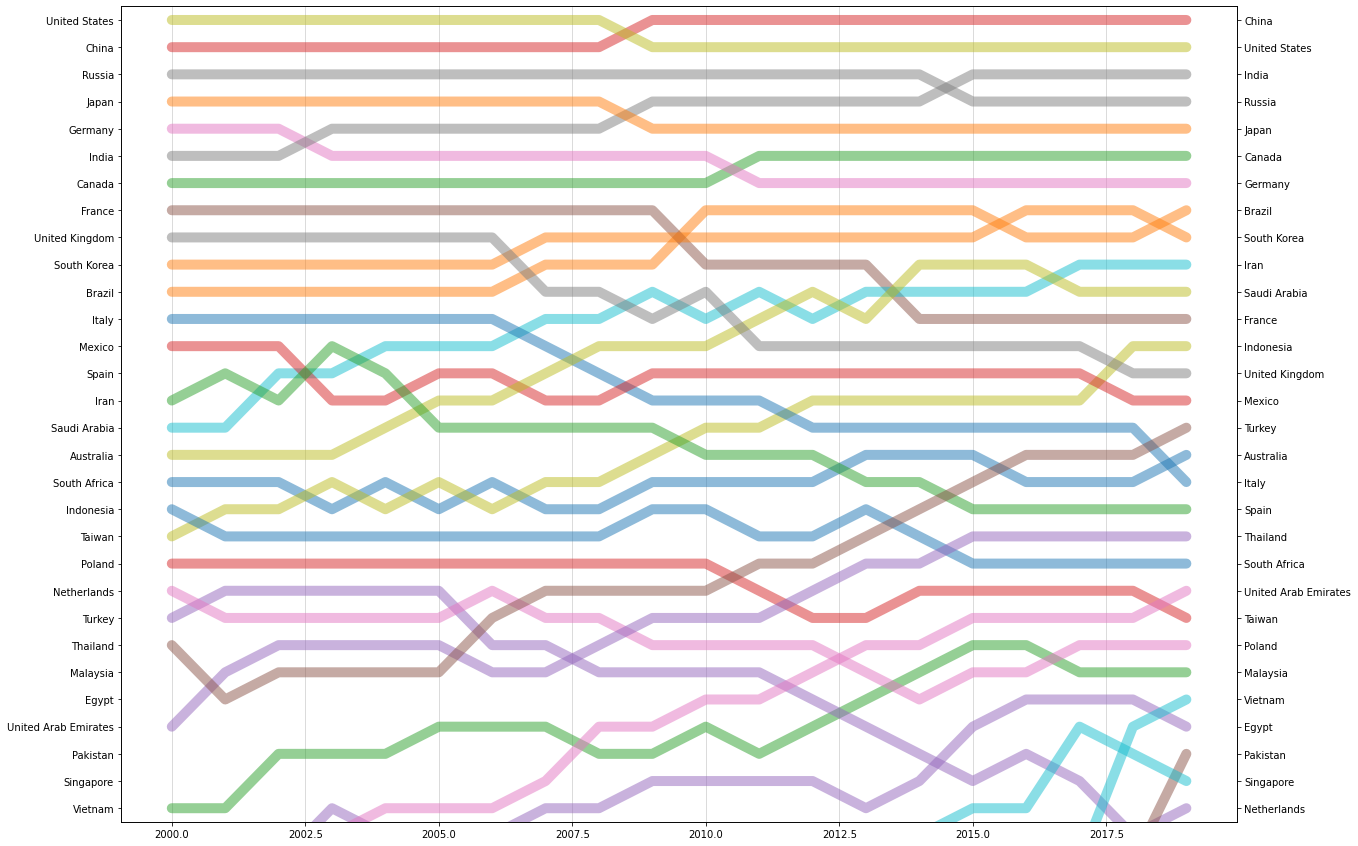

In [10]:
# Put everything on the Bump Chart to see how ranking changes over the years
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(20, 15))

[laxis, raxis] = bumpchart(df_top_countries_rank, show_rank_axis= False,
                           ax= None, 
                           scatter= False,
                           holes= True,
                           line_args= {"linewidth": 10, "alpha": 0.5})

laxis.xaxis.grid(color='lightgray', linestyle='solid')
plt.show()

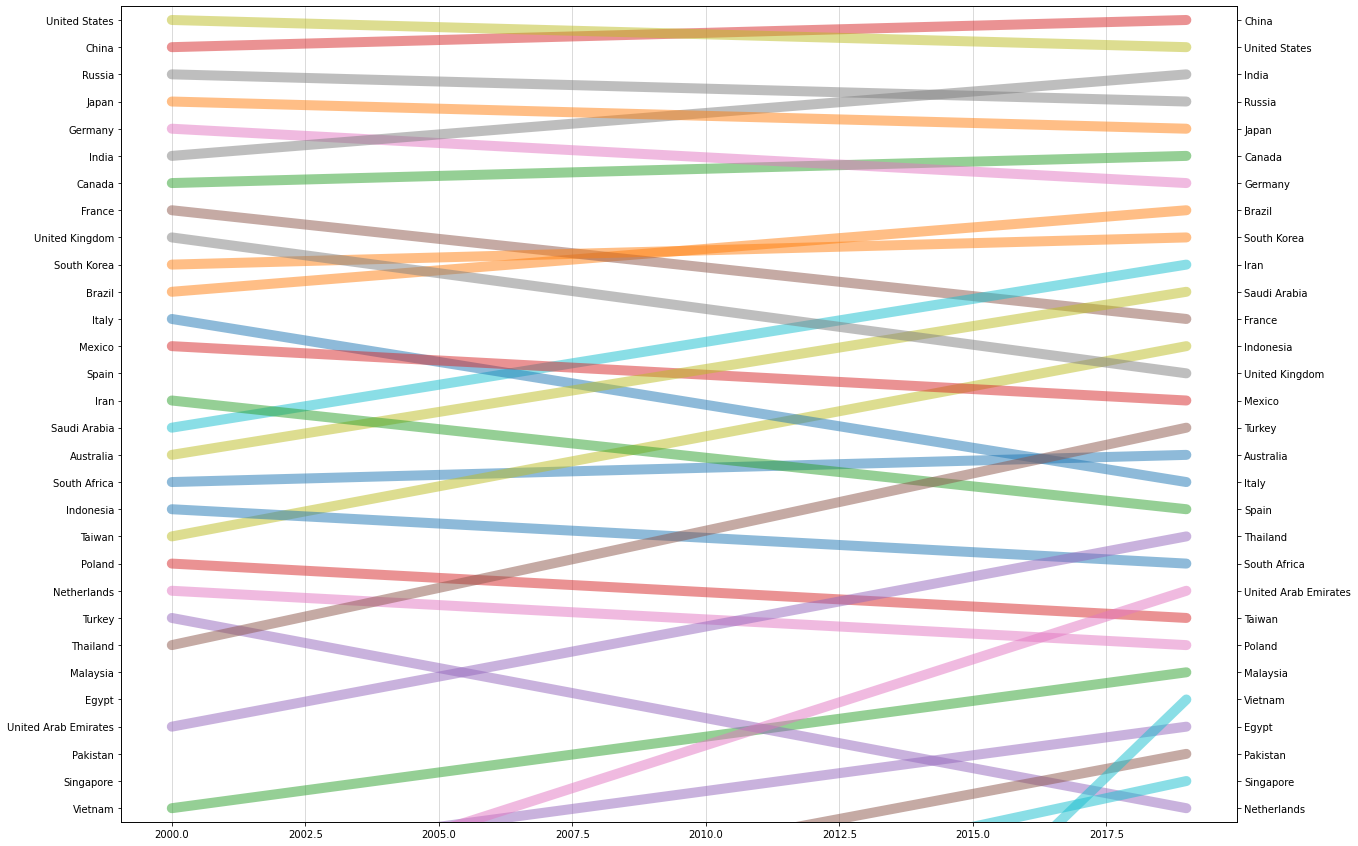

In [11]:
# This shows the first and last year ranking change - Ignored all records inbetween
# Gets rid of some of the clutter of changing rank 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(20, 15))

[laxis, raxis] = bumpchart(df_top_countries_rank_simple, show_rank_axis= False,
                           ax= None, 
                           scatter= False,
                           holes= True,
                           line_args= {"linewidth": 10, "alpha": 0.5})

laxis.xaxis.grid(color='lightgray', linestyle='solid')
plt.show()



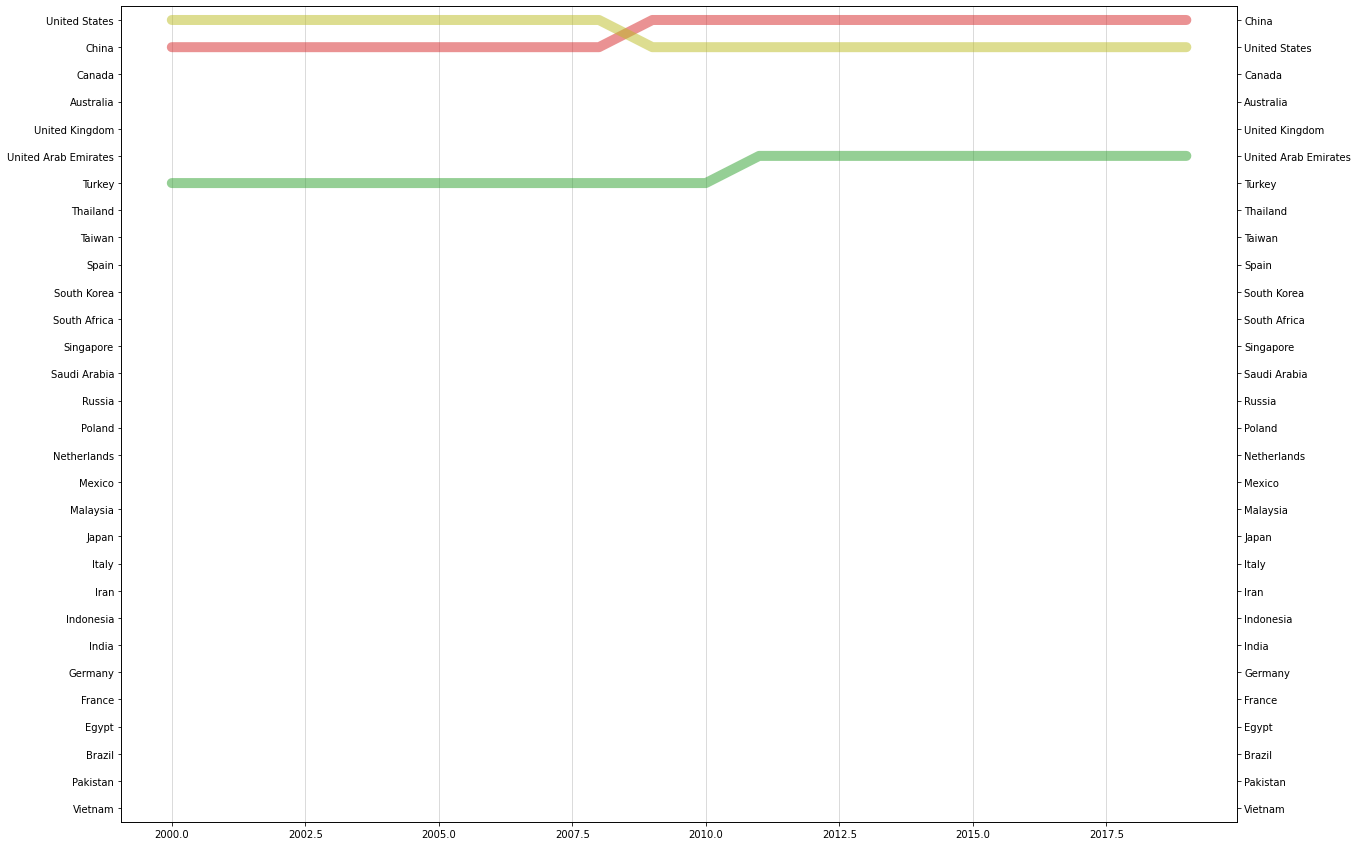

In [20]:
# Top three countries with stable energy usage.  Areas that are possibly obvious choices or easy targets due to high usage
# Note: Countries are listed Ranking for the ones to highlight/seperate out, then the rest.  
# Any country we didn't want to show had values set to 999 so it would show up on the bottom

# United States - Has dropped from #1 to #2 - however, it is still one of the top electricy usage
# China - #2 to #1 - Shows growth and has high usage
# Canada - Increased ranking slightly and a solid top choice

# India is another solid choice - however due to the increased rank over time I put it in the next grouping

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(20, 15))

[laxis, raxis] = bumpchart(df_top_countries_rank_obvious_choice, show_rank_axis= False,
                           ax= None, 
                           scatter= False,
                           holes= True,
                           line_args= {"linewidth": 10, "alpha": 0.5})

laxis.xaxis.grid(color='lightgray', linestyle='solid')

plt.show()



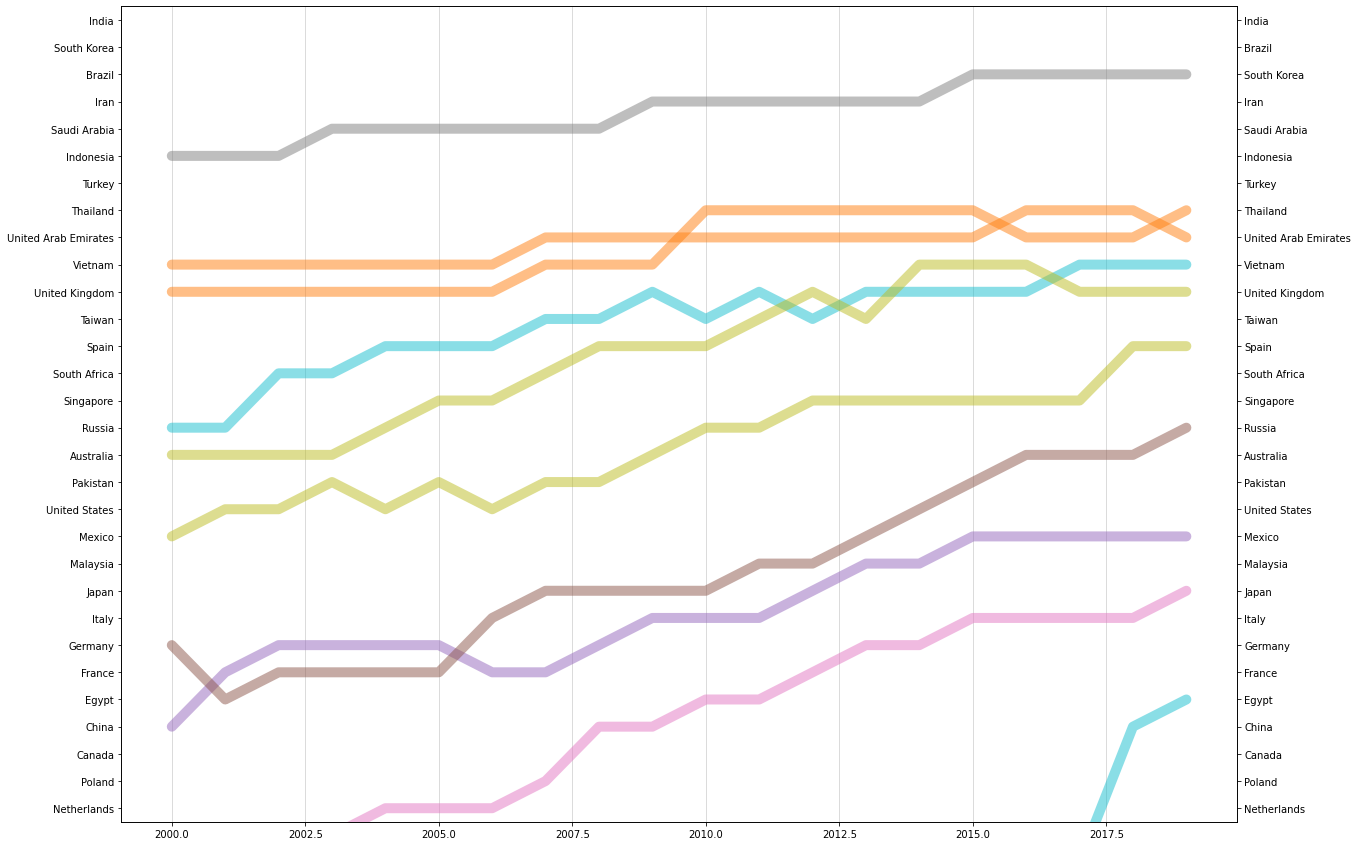

In [19]:
# Growth Opportunities - Countries that show strong potential and have increased growth/ranking
# Note: Countries are listed Ranking for the ones to highlight/seperate out, then the rest.  
# Any country we didn't want to show had values set to 999 so it would show up on the bottom

# I don't suggest targeting all of these, just a strong list of potential targets

# One thing to keep in mind are possible political issues, that's why I kept the list longer

# India - #6 to #3
# South Korea <-- Unsure - Possible
# Brazil <-- Unsure - Possible
# Iran
# Saudi Arabia
# Indonesia
# Turkey
# Thalind
# United Arib Emerits
# Vietnom

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(20, 15))

[laxis, raxis] = bumpchart(df_top_countries_rank_growth, show_rank_axis= False,
                           ax= None, 
                           scatter= False,
                           holes= True,
                           line_args= {"linewidth": 10, "alpha": 0.5})

laxis.xaxis.grid(color='lightgray', linestyle='solid')
plt.show()



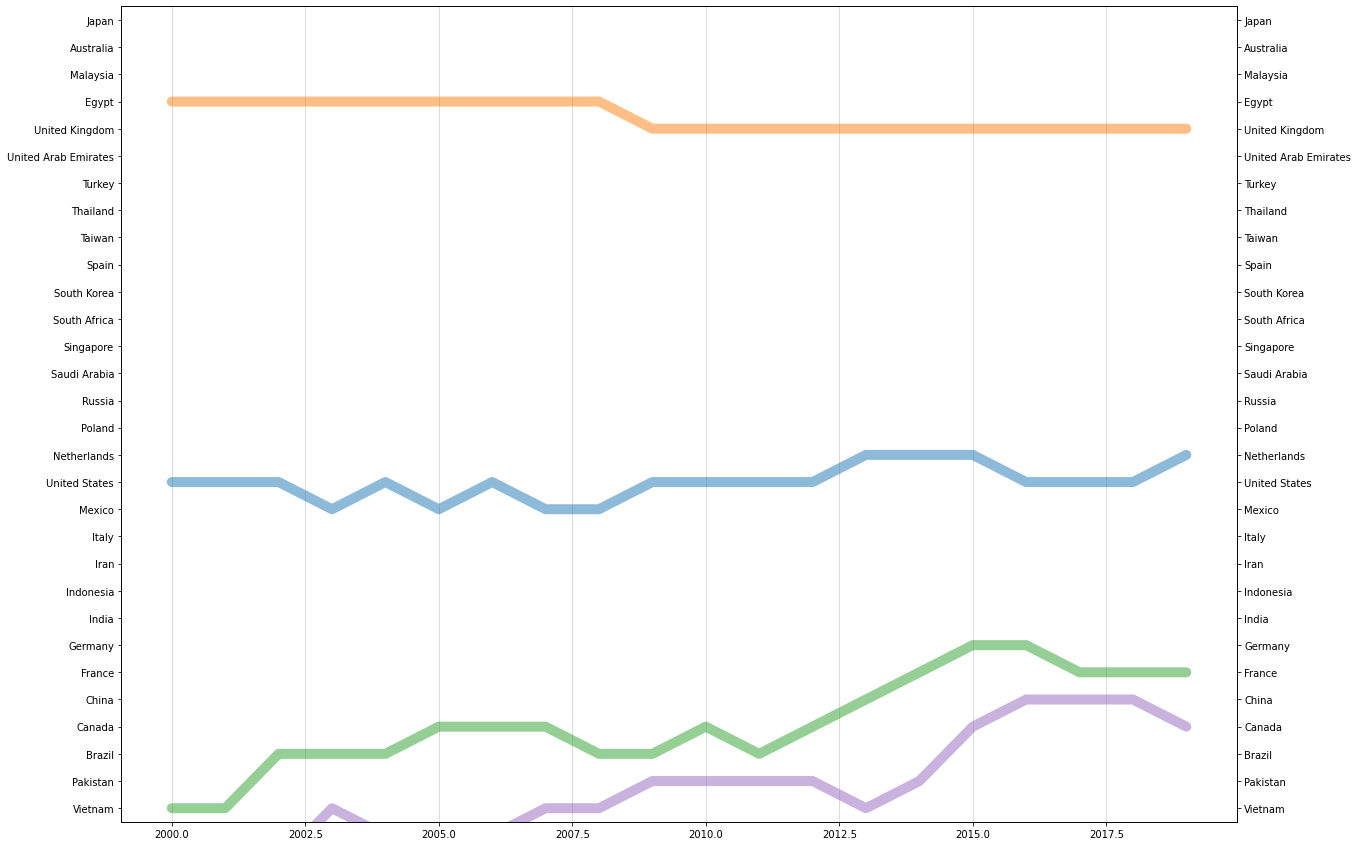

In [18]:
# Stable - Not much movement, Ignore but might have slight possibiliy as there is at least some increase or steady usage
# Note: Countries are listed Ranking for the ones to highlight/seperate out, then the rest.  
# Any country we didn't want to show had values set to 999 so it would show up on the bottom

# Japan (Decreased but high usage)
# Australia
# Mylasia
# Egypt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(20, 15))

[laxis, raxis] = bumpchart(df_top_countries_rank_unsure, show_rank_axis= False,
                           ax= None, 
                           scatter= False,
                           holes= True,
                           line_args= {"linewidth": 10, "alpha": 0.5})

laxis.xaxis.grid(color='lightgray', linestyle='solid')
plt.show()



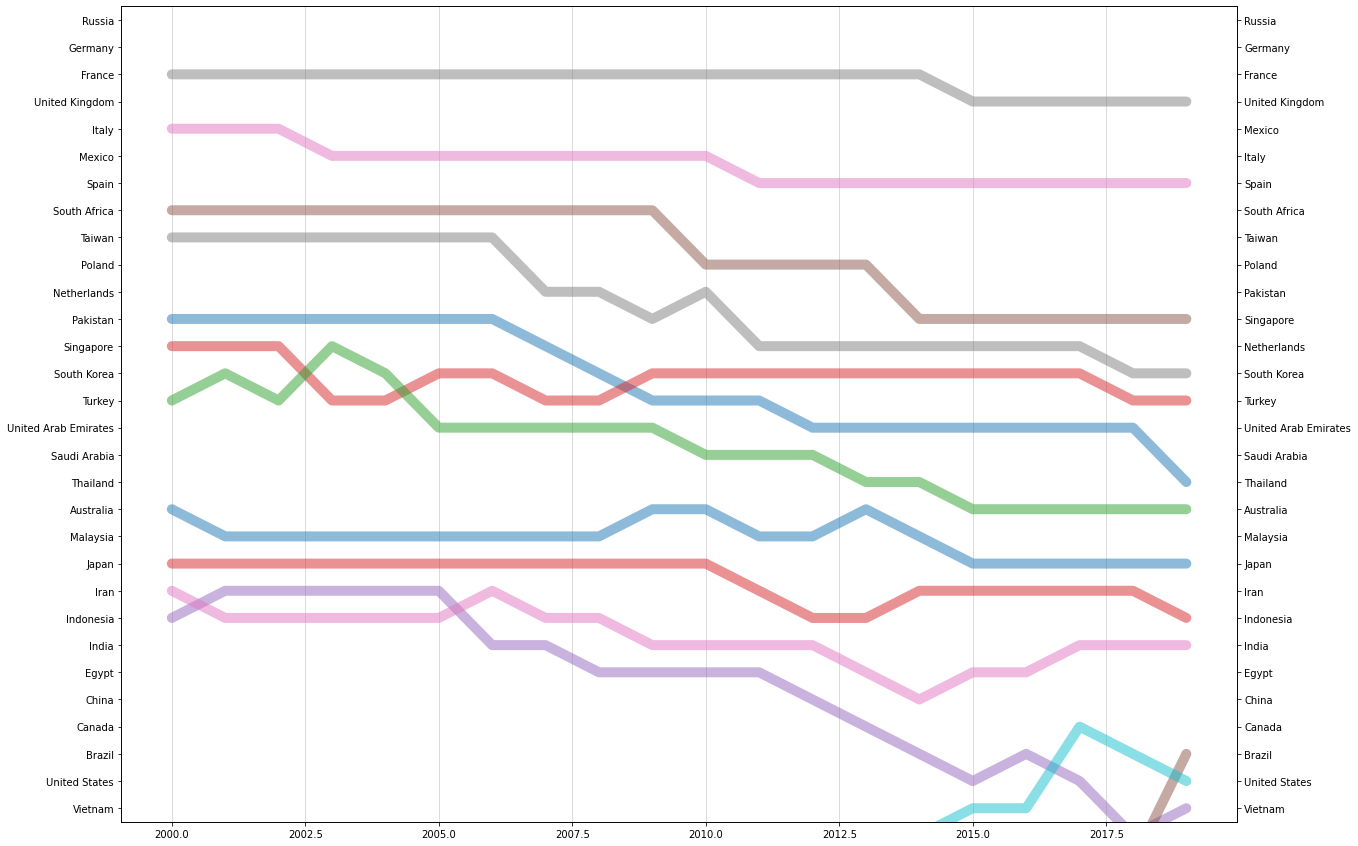

In [17]:
# Areas to Avoid
# Note: Countries are listed Ranking for the ones to highlight/seperate out, then the rest. 
# Any country we didn't want to show had values set to 999 so it would show up on the bottom

# Russia - Decreased from 3 to 4, also Political Reasons to ignore
# Germany - Decreased
# France - Decreaed
# United Kingdom
# Italy
# Mexico
# Spain
# South Africa
# Taiwan
# Poland
# Netherlands
# Pakistan
# Singapore

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(20, 15))

[laxis, raxis] = bumpchart(df_top_countries_rank_ignore, show_rank_axis= False,
                           ax= None, 
                           scatter= False,
                           holes= True,
                           line_args= {"linewidth": 10, "alpha": 0.5})

laxis.xaxis.grid(color='lightgray', linestyle='solid')
plt.show()

